In [1]:
import numpy as np
import matplotlib.pyplot as plt
import treatgan_model as tg

In [2]:
def plotDiffHist(real_data, gen_data, color, label='', **kwargs):
    bins = np.linspace(0,10,11)
    n_rows = np.shape(real_data)[0]
    rounded_gen_data = np.round(gen_data)
    diffs = []
    for i in range(n_rows):
        diffs.append(np.sum(np.abs(rounded_gen_data[i,:]-real_data[i,:])))
        
    plt.hist(diffs,bins,color=color,histtype='step', normed=True, label=label)
    
    plt.vlines(np.mean(diffs),0,0.5,linewidth=0.5,color=color)
    #plt.show()
    
def showHist():
    plt.ylabel('percentage')
    plt.xlabel('digits deviation')
    plt.title('different condition')
    plt.legend(loc='best')
    plt.show()
    
    
def plotValuation(eval_dict):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col')#, sharey='row')
    ax1.hist(eval_dict['y_hat_real_train'])
    ax1.set_title('train')
    ax1.set_ylabel('training data')
    ax2.hist(eval_dict['y_hat_real_valid'])
    ax2.set_title('valid')
    ax3.hist(eval_dict['y_hat_fake_train'])
    ax3.set_ylabel('generator data')
    ax4.hist(eval_dict['y_hat_fake_valid'])
    plt.show()
    
def plotGenOutput(eval_dict, train_data, valid_data):
    f, (ax1, ax2) = plt.subplots(1, 2, sharex='col',figsize=(5,10))#, sharey='row')
    ax1.imshow(train_data)
    ax1.set_title('training data')
    ax1.set_ylabel('train')
    ax1.axis('tight')
    ax2.imshow(eval_dict['x_gen_train'])
    ax2.axis('tight')
    ax2.set_title('generator')


    f, (ax3, ax4) = plt.subplots(1, 2, sharex='col',figsize=(5,1))#, sharey='row')

    ax3.imshow(valid_data)
    ax3.set_ylabel('valid')
    ax3.axis('tight')

    ax4.imshow(eval_dict['x_gen_valid'])
    ax4.axis('tight')

    plt.show()

In [3]:
start_train =78
end_train = 81
trainings = list(range(start_train,end_train+1))


setting_a = {'inputDim':21,
             'condDim':210,
             'embeddingDim':16,
             'randomDim':210,
             'compressDims':[],
             'decompressDims':[],
             'generatorDims':(256, 128, 16),
             'discriminatorDims':(512, 256, 128, 1)}

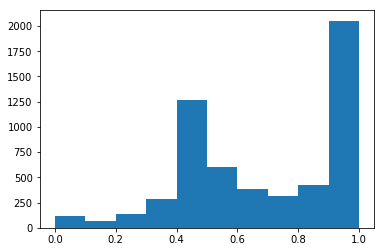

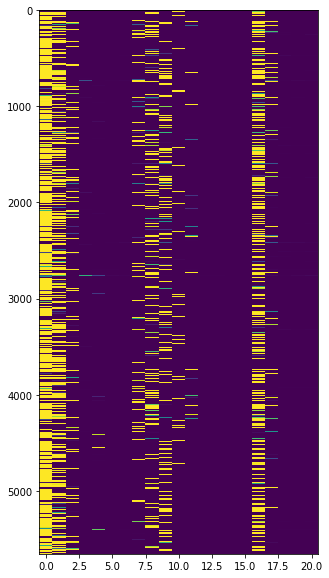

In [4]:
training = 74
data_version = 'v4'
last_evals = {}

training_name = str(training).zfill(3)
last_evals[training_name] = {}

    
data_set_treat = '/treat_gan/treat_gan_training_data/treatgan_'+data_version+'_treat.npy'
data_set_demo = '/treat_gan/treat_gan_training_data/treatgan_'+data_version+'_demo.npy'

training_cond = np.load(data_set_demo)
training_data = np.load(data_set_treat)

data_path = 'treat_gan/treat_gan_training_results/treatgan_'+training_name+'/'

last_eval_path = data_path+'treatgan'+training_name+'_last_eval.npz'

model_path = data_path+'treatgan'+training_name


last_eval = np.load(last_eval_path)
train_ind = np.load(data_path+'train_ind.npy')
valid_ind = np.load(data_path+'valid_ind.npy')

train_data = training_data[train_ind]
valid_data = training_data[valid_ind]

last_evals[training_name]['last_eval'] = last_eval
last_evals[training_name]['train_data'] = train_data
last_evals[training_name]['valid_data'] = valid_data
    
treatgan = tg.treatgan_load(model_path, **setting_a)

yhat = treatgan.discriminateData(training_data,training_cond)
plt.hist(yhat)
plt.show()
x_gen = treatgan.generateData(training_cond)
plt.figure(figsize=(5,10))
plt.imshow(x_gen)

plt.axis('tight')
plt.show()

In [ ]:
labels=['no genes','with genes'] 
labels = ['2000','3000','4000','5000','5000']
labels = ['no treatment', 'treatment']
colors = ['C0','C1', 'C2', 'C4','C5']
for color,label,training in zip(colors,labels,trainings):
    training_name = str(training).zfill(3)
    plotDiffHist(last_evals[training_name]['train_data'], last_evals[training_name]['last_eval']['x_gen_train'],color, label=label)
showHist()


for color,label,training in zip(colors,labels,trainings):
    
    training_name = str(training).zfill(3)
    plotDiffHist(last_evals[training_name]['valid_data'], last_evals[training_name]['last_eval']['x_gen_valid'],color, label=label)
showHist()

In [ ]:
for training in trainings:
    training_name = str(training).zfill(3)
    plotValuation(last_evals[training_name]['last_eval'])

In [ ]:
for training in trainings:
    training_name = str(training).zfill(3)
    plotGenOutput(last_evals[training_name]['last_eval'],last_evals[training_name]['train_data'],last_evals[training_name]['valid_data'])

In [ ]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col')#, sharey='row')
ax1.hist(last_eval['y_hat_real_train'])
ax1.set_title('train')
ax1.set_ylabel('training data')
ax2.hist(last_eval['y_hat_real_valid'])
ax2.set_title('valid')
ax3.hist(last_eval['y_hat_fake_train'])
ax3.set_ylabel('generator data')

ax4.hist(last_eval['y_hat_fake_valid'])
plt.show()

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharex='col',figsize=(5,10))#, sharey='row')
ax1.imshow(train_data)
ax1.set_title('training data')
ax1.set_ylabel('train')
ax1.axis('tight')
ax2.imshow(last_eval['x_gen_train'])
ax2.axis('tight')
ax2.set_title('generator')


f, (ax3, ax4) = plt.subplots(1, 2, sharex='col',figsize=(5,1))#, sharey='row')

ax3.imshow(valid_data)
ax3.set_ylabel('valid')
ax3.axis('tight')


ax4.imshow(last_eval['x_gen_valid'])
ax4.axis('tight')

plt.show()

In [ ]:
print(np.shape(last_eval['x_gen_valid']))